In [48]:
## IMPORTS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from numba import njit
from pandas import DataFrame, read_csv, concat
import os, h5py, pystan
import _pickle as pickle
import matplotlib

In [49]:
import seaborn as sns
#sns.set_style('notebook', style='white', font='sans-serif', font_scale=1.33)
%matplotlib inline

# TDLR+P Model

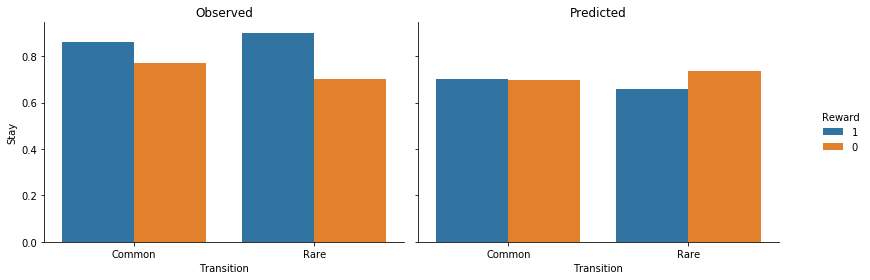

In [50]:
TDLRP_hy = read_csv("HY30_PPC_TDLRP.csv")
TDLRP_hy_SF = read_csv("HY30_PPC_TDLRP_stanfit.csv")

# Need to replace column name for first column
TDLRP_hy_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=TDLRP_hy, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=TDLRP_hy, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

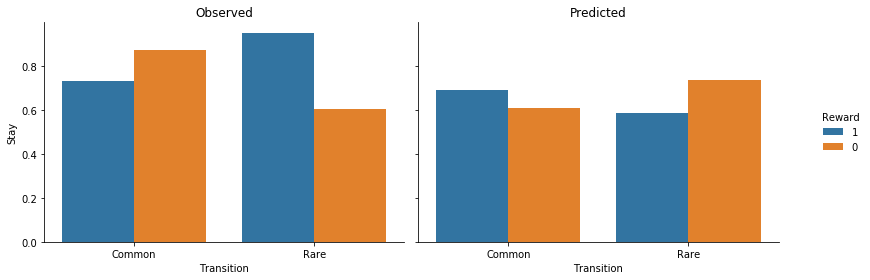

In [51]:
TDLRP_mb = read_csv("MB30_PPC_TDLRP.csv")
TDLRP_mb_SF = read_csv("MB30_PPC_TDLRP_stanfit.csv")

# Need to replace column name for first column
TDLRP_mb_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=TDLRP_mb, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=TDLRP_mb, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

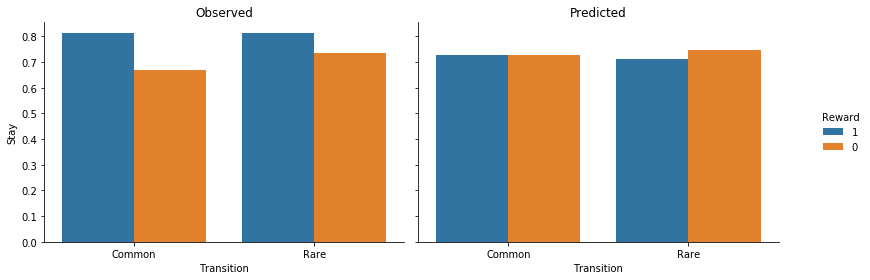

In [52]:
TDLRP_mf = read_csv("MF30_PPC_TDLRP.csv")
TDLRP_mf_SF = read_csv("MF30_PPC_TDLRP_stanfit.csv")

# Need to replace column name for first column
TDLRP_mf_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=TDLRP_mf, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=TDLRP_mf, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

# TDLR Model

In [53]:
TDLR_hy = read_csv("HY30_PPC_TDLR.csv")
TDLR_hy_SF = read_csv("HY30_PPC_TDLR_stanfit.csv")
# Need to replace column name for first column
TDLR_hy_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

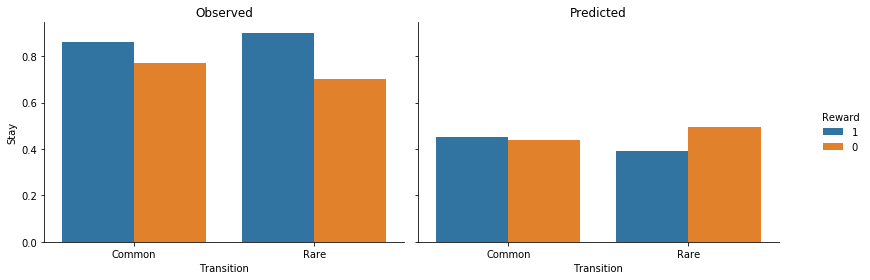

In [54]:
## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=TDLR_hy, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=TDLR_hy, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

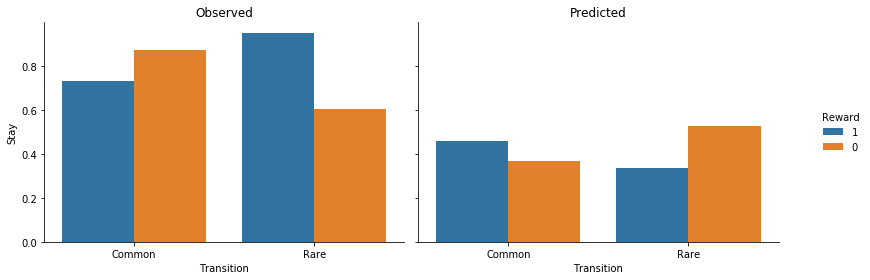

In [55]:
TDLR_mb = read_csv("MB30_PPC_TDLR.csv")
TDLR_mb_SF = read_csv("MB30_PPC_TDLR_stanfit.csv")

# Need to replace column name for first column
TDLR_mb_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=TDLR_mb, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=TDLR_mb, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

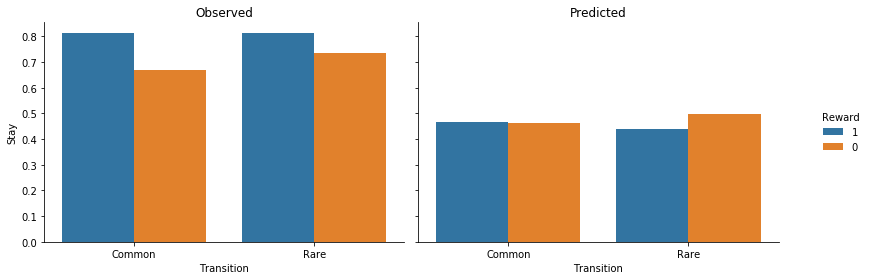

In [56]:
TDLR_mf = read_csv("MF30_PPC_TDLR.csv")
TDLR_mf_SF = read_csv("MF30_PPC_TDLR_stanfit.csv")

# Need to replace column name for first column
TDLR_mf_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=TDLR_mf, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=TDLR_mf, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

# Hybrid+P Model

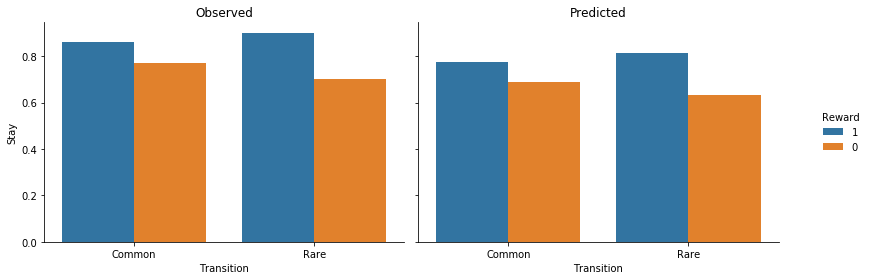

In [57]:
p_hyb_hy = read_csv("HY30_PPC_P_hybrid.csv")
p_hyb_hy_SF = read_csv("HY30_PPC_p_hyb_stanfit.csv")

# Need to replace column name for first column
p_hyb_hy_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=p_hyb_hy, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=p_hyb_hy, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

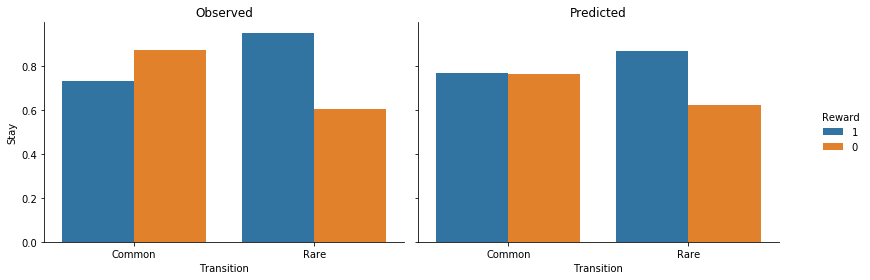

In [58]:
p_hyb_mb = read_csv("MB30_PPC_P_hybrid.csv")
p_hyb_mb_SF = read_csv("MB30_PPC_p_hyb_stanfit.csv")

# Need to replace column name for first column
p_hyb_mb_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=p_hyb_mb, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=p_hyb_mb, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

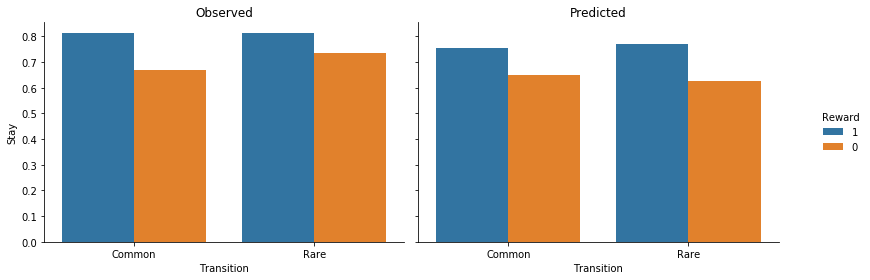

In [59]:
p_hyb_mf = read_csv("MF30_PPC_P_hybrid.csv")
p_hyb_mf_SF = read_csv("MF30_PPC_p_hyb_stanfit.csv")

# Need to replace column name for first column
p_hyb_mf_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=p_hyb_mf, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=p_hyb_mf, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

# Hybrid

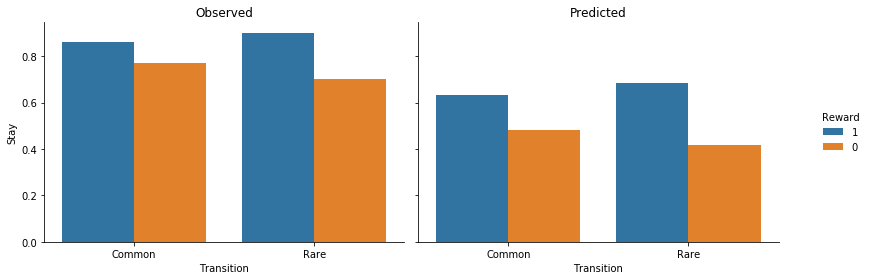

In [60]:
hyb_hy = read_csv("HY30_PPC_hybrid.csv")
hyb_hy_SF = read_csv("HY30_PPC_hyb_stanfit.csv")

# Need to replace column name for first column
hyb_hy_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=hyb_hy, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=hyb_hy, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

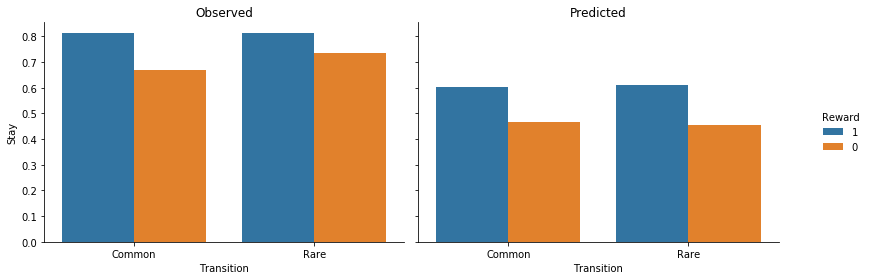

In [61]:
hyb_mf = read_csv("MF30_PPC_hybrid.csv")
hyb_mf_SF = read_csv("MF30_PPC_hyb_stanfit.csv")

# Need to replace column name for first column
hyb_mf_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=hyb_mf, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=hyb_mf, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

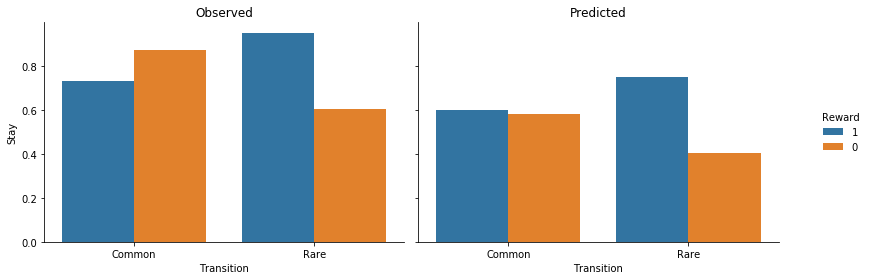

In [62]:
hyb_mb = read_csv("MB30_PPC_hybrid.csv")
hyb_mb_SF = read_csv("MB30_PPC_hyb_stanfit.csv")

# Need to replace column name for first column
hyb_mb_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=hyb_mb, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=hyb_mb, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

# EAPF Model (n1)

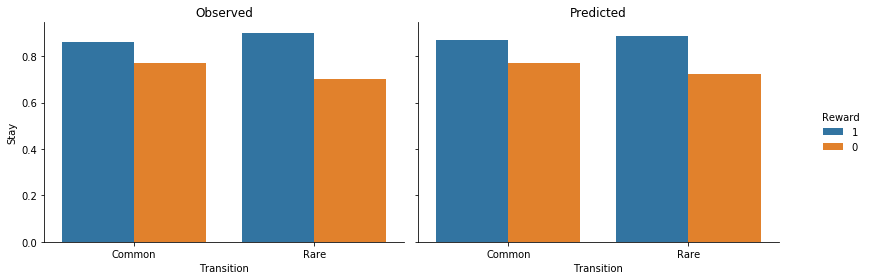

In [63]:
n1EAPF_hy = read_csv("HY30_PPC_n1EAPF.csv")
n1EAPF_hy_SF = read_csv("HY30_PPC_n1EAPF_stanfit.csv")

# Need to replace column name for first column
n1EAPF_hy_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=n1EAPF_hy, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=n1EAPF_hy, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

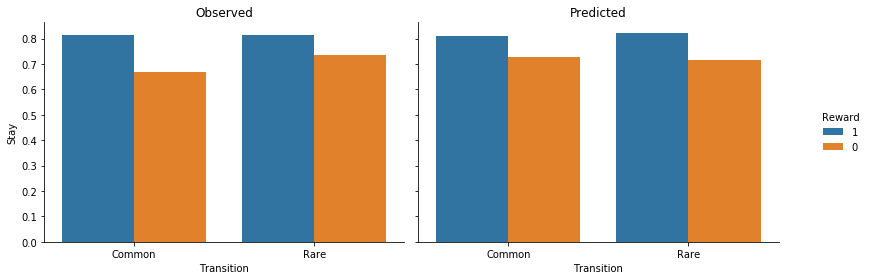

In [64]:
n1EAPF_mf = read_csv("MF30_PPC_n1EAPF.csv")
n1EAPF_mf_SF = read_csv("MF30_PPC_n1EAPF_stanfit.csv")

# Need to replace column name for first column
n1EAPF_mf_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=n1EAPF_mf, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=n1EAPF_mf, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

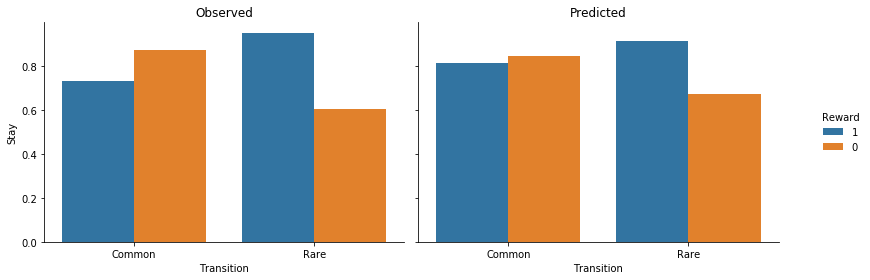

In [65]:
n1EAPF_mb = read_csv("MB30_PPC_n1EAPF.csv")
n1EAPF_mb_SF = read_csv("MB30_PPC_n1EAPF_stanfit.csv")

# Need to replace column name for first column
n1EAPF_mb_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=n1EAPF_mb, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=n1EAPF_mb, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

# EAPFU Model (n1)

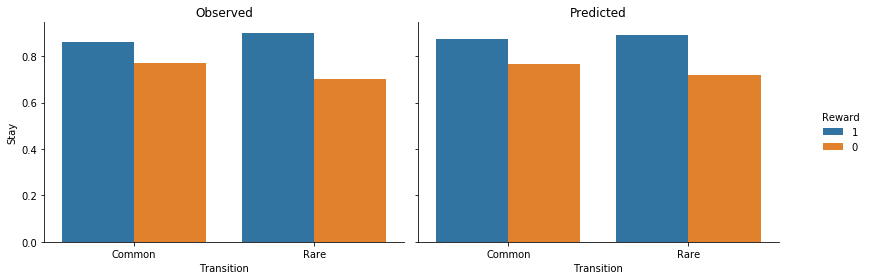

In [66]:
n1EAPFU_hy = read_csv("HY30_PPC_n1EAPFU.csv")
n1EAPFU_hy_SF = read_csv("HY30_PPC_n1EAPFU_stanfit.csv")

# Need to replace column name for first column
n1EAPFU_hy_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=n1EAPFU_hy, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=n1EAPFU_hy, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

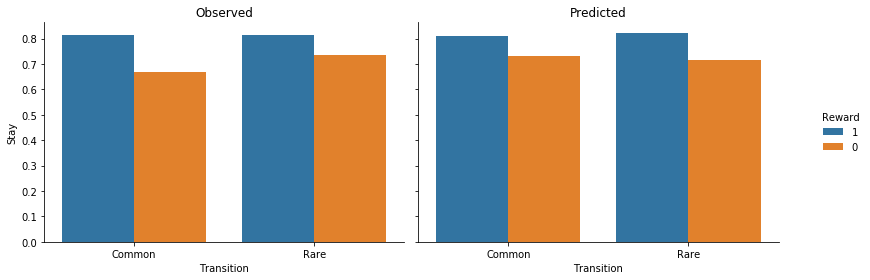

In [67]:
n1EAPFU_mf = read_csv("MF30_PPC_n1EAPFU.csv")
n1EAPFU_mf_SF = read_csv("MF30_PPC_n1EAPFU_stanfit.csv")

# Need to replace column name for first column
n1EAPFU_mf_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=n1EAPFU_mf, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=n1EAPFU_mf, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

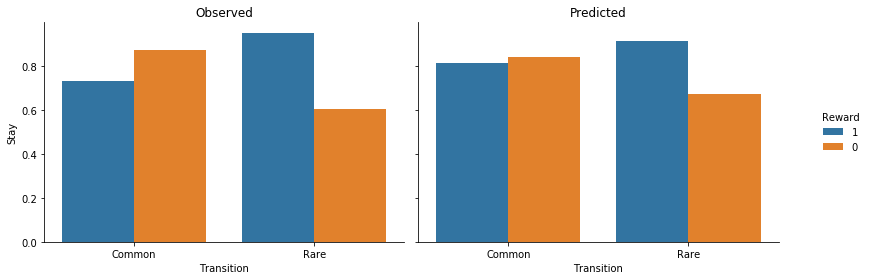

In [68]:
n1EAPFU_mb = read_csv("MB30_PPC_n1EAPFU.csv")
n1EAPFU_mb_SF = read_csv("MB30_PPC_n1EAPFU_stanfit.csv")

# Need to replace column name for first column
n1EAPFU_mb_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=n1EAPFU_mb, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=n1EAPFU_mb, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

# EAPFL Model (n1)

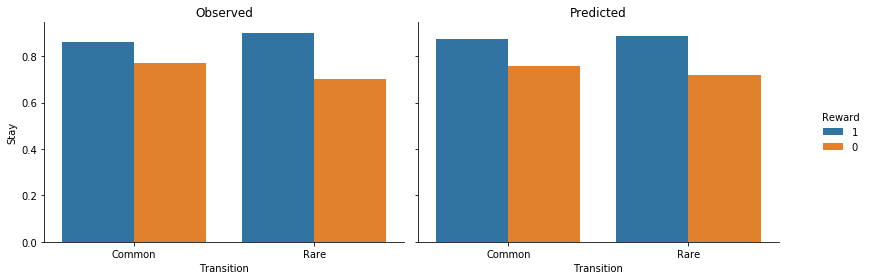

In [69]:
n1EAPFL_hy = read_csv("HY30_PPC_n1EAPFL.csv")
n1EAPFL_hy_SF = read_csv("HY30_PPC_n1EAPFL_stanfit.csv")

# Need to replace column name for first column
n1EAPFL_hy_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=n1EAPFL_hy, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=n1EAPFL_hy, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

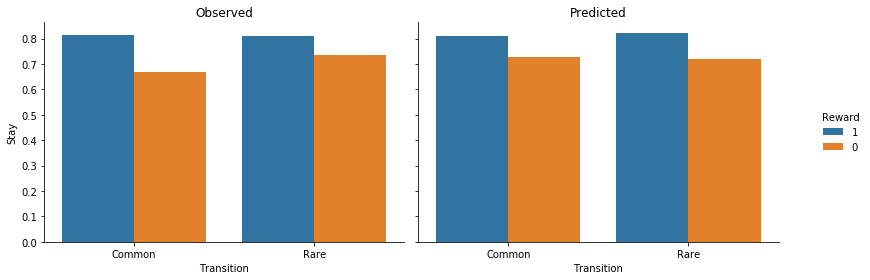

In [70]:
n1EAPFL_mf = read_csv("MF30_PPC_n1EAPFL.csv")
n1EAPFL_mf_SF = read_csv("MF30_PPC_n1EAPFL_stanfit.csv")

# Need to replace column name for first column
n1EAPFL_mf_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=n1EAPFL_mf, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=n1EAPFL_mf, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

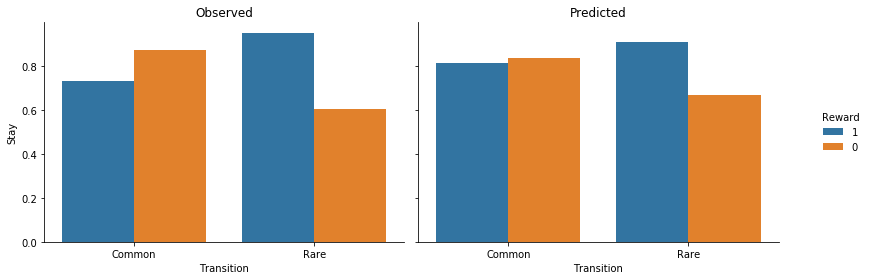

In [71]:
n1EAPFL_mb = read_csv("MB30_PPC_n1EAPFL.csv")
n1EAPFL_mb_SF = read_csv("MB30_PPC_n1EAPFL_stanfit.csv")

# Need to replace column name for first column
n1EAPFL_mb_SF.rename(columns={'Unnamed: 0': 'value'}, inplace=True)

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

## Plot observed data.
sns.barplot(x='prev_t', y='stay', hue='prev_r', data=n1EAPFL_mb, hue_order=[1, 0], ci=None, ax=axes[0])
axes[0].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='Stay', title='Observed')
axes[0].legend_.set_visible(False)

## Plot predicted data.
sns.barplot(x='prev_t', y='stay_hat', hue='prev_r', data=n1EAPFL_mb, hue_order=[1, 0], ci=None, ax=axes[1])
axes[1].set(xticklabels=['Common','Rare'], xlabel='Transition', ylabel='', title='Predicted')
axes[1].legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False, title='Reward')

sns.despine()
plt.tight_layout()

# TOTAL COMPARISONS

## Scatter Plots

In [72]:
## Create All 90 Subject DataFrames
TDLR = [TDLR_mf, TDLR_mb, TDLR_hy]
TDLR = concat(TDLR)

TDLRP = [TDLRP_mf, TDLRP_mb, TDLRP_hy]
TDLRP = concat(TDLRP)

HYBP = [p_hyb_mf, p_hyb_mb, p_hyb_hy]
HYBP = concat(HYBP)

HYB = [hyb_mf, hyb_mb, hyb_hy]
HYB = concat(HYB)

n1EAPF = concat([n1EAPF_mf, n1EAPF_mb, n1EAPF_hy])

n1EAPFU = concat([n1EAPFU_mf, n1EAPFU_mb, n1EAPFU_hy])

n1EAPFL = concat([n1EAPFL_mf, n1EAPFL_mb, n1EAPFL_hy])

In [73]:
## Get Stay and Stay_Hat averages across all subjects for each model
# TDLR
subjects = [*TDLR_mf['subject'].unique(), *TDLR_mb['subject'].unique(), *TDLR_hy['subject'].unique()]
stays = []
stayhats = []
tdat_TDLR = []
for s in subjects:
    sd = TDLR.loc[TDLR['subject'] == s]
    stay = sd['stay'].values.mean()
    sh = sd['stay_hat'].values.mean()
    
    cols = ['subject', 'stay_avg', 'stay_hat_avg']
    dat = DataFrame(np.column_stack([s, stay, sh]), columns=cols)
    tdat_TDLR.append(dat)
    
    stays.append(stay)
    stayhats.append(sh)
    
tdat_TDLR = concat(tdat_TDLR)

# TDLRP
subjects = [*TDLRP_mf['subject'].unique(), *TDLRP_mb['subject'].unique(), *TDLRP_hy['subject'].unique()]
stays = []
stayhats = []
tdat_TDLRP = []
for s in subjects:
    sd = TDLRP.loc[TDLRP['subject'] == s]
    stay = sd['stay'].values.mean()
    sh = sd['stay_hat'].values.mean()
    
    cols = ['subject', 'stay_avg', 'stay_hat_avg']
    dat = DataFrame(np.column_stack([s, stay, sh]), columns=cols)
    tdat_TDLRP.append(dat)
    
    stays.append(stay)
    stayhats.append(sh)
    
tdat_TDLRP = concat(tdat_TDLRP)

# HYBP
subjects = [*p_hyb_mf['subject'].unique(), *p_hyb_mb['subject'].unique(), *p_hyb_hy['subject'].unique()]
stays = []
stayhats = []
tdat_HYBP = []
for s in subjects:
    sd = HYBP.loc[HYBP['subject'] == s]
    stay = sd['stay'].values.mean()
    sh = sd['stay_hat'].values.mean()
    
    cols = ['subject', 'stay_avg', 'stay_hat_avg']
    dat = DataFrame(np.column_stack([s, stay, sh]), columns=cols)
    tdat_HYBP.append(dat)
    
    stays.append(stay)
    stayhats.append(sh)
    
tdat_HYBP = concat(tdat_HYBP)

# HYB
subjects = [*hyb_mf['subject'].unique(), *hyb_mb['subject'].unique(), *hyb_hy['subject'].unique()]
stays = []
stayhats = []
tdat_HYB = []
for s in subjects:
    sd = HYB.loc[HYB['subject'] == s]
    stay = sd['stay'].values.mean()
    sh = sd['stay_hat'].values.mean()
    
    cols = ['subject', 'stay_avg', 'stay_hat_avg']
    dat = DataFrame(np.column_stack([s, stay, sh]), columns=cols)
    tdat_HYB.append(dat)
    
    stays.append(stay)
    stayhats.append(sh)
    
tdat_HYB = concat(tdat_HYB)

# n1EAPF
subjects = [*n1EAPF_mf['subject'].unique(), *n1EAPF_mb['subject'].unique(), *n1EAPF_hy['subject'].unique()]
stays = []
stayhats = []
tdat_n1EAPF = []
for s in subjects:
    sd = n1EAPF.loc[n1EAPF['subject'] == s]
    stay = sd['stay'].values.mean()
    sh = sd['stay_hat'].values.mean()
    
    cols = ['subject', 'stay_avg', 'stay_hat_avg']
    dat = DataFrame(np.column_stack([s, stay, sh]), columns=cols)
    tdat_n1EAPF.append(dat)
    
    stays.append(stay)
    stayhats.append(sh)
    
tdat_n1EAPF = concat(tdat_n1EAPF)

# n1EAPFU
subjects = [*n1EAPFU_mf['subject'].unique(), *n1EAPFU_mb['subject'].unique(), *n1EAPFU_hy['subject'].unique()]
stays = []
stayhats = []
tdat_n1EAPFU = []
for s in subjects:
    sd = n1EAPFU.loc[n1EAPFU['subject'] == s]
    stay = sd['stay'].values.mean()
    sh = sd['stay_hat'].values.mean()
    
    cols = ['subject', 'stay_avg', 'stay_hat_avg']
    dat = DataFrame(np.column_stack([s, stay, sh]), columns=cols)
    tdat_n1EAPFU.append(dat)
    
    stays.append(stay)
    stayhats.append(sh)
    
tdat_n1EAPFU = concat(tdat_n1EAPFU)

# n1EAPFL
subjects = [*n1EAPFL_mf['subject'].unique(), *n1EAPFL_mb['subject'].unique(), *n1EAPFL_hy['subject'].unique()]
stays = []
stayhats = []
tdat_n1EAPFL = []
for s in subjects:
    sd = n1EAPFL.loc[n1EAPFL['subject'] == s]
    stay = sd['stay'].values.mean()
    sh = sd['stay_hat'].values.mean()
    
    cols = ['subject', 'stay_avg', 'stay_hat_avg']
    dat = DataFrame(np.column_stack([s, stay, sh]), columns=cols)
    tdat_n1EAPFL.append(dat)
    
    stays.append(stay)
    stayhats.append(sh)
    
tdat_n1EAPFL = concat(tdat_n1EAPFL)

Text(0.5, 1.0, 'All Participants')

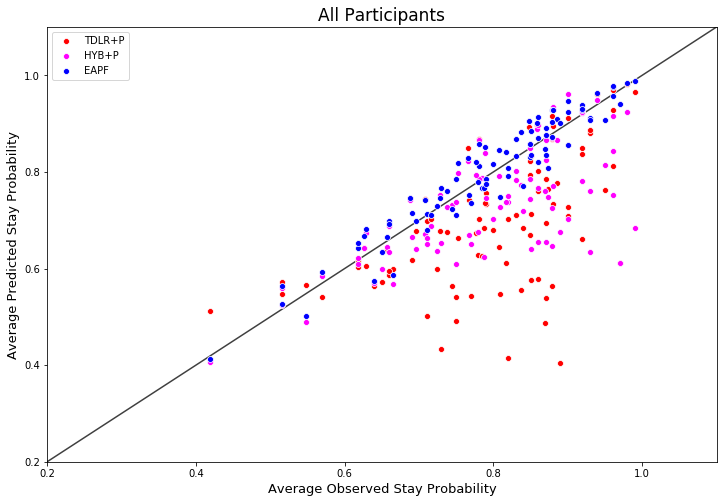

In [77]:
TDLRPxs = tdat_TDLRP['stay_avg'].values.astype(float)
TDLRPys = tdat_TDLRP['stay_hat_avg'].values.astype(float)

TDLRxs = tdat_TDLR['stay_avg'].values.astype(float)
TDLRys = tdat_TDLR['stay_hat_avg'].values.astype(float)

HYBPxs = tdat_HYBP['stay_avg'].values.astype(float)
HYBPys = tdat_HYBP['stay_hat_avg'].values.astype(float)

HYBxs = tdat_HYB['stay_avg'].values.astype(float)
HYBys = tdat_HYB['stay_hat_avg'].values.astype(float)

n1EAPFxs = tdat_n1EAPF['stay_avg'].values.astype(float)
n1EAPFys = tdat_n1EAPF['stay_hat_avg'].values.astype(float)

n1EAPFUxs = tdat_n1EAPFU['stay_avg'].values.astype(float)
n1EAPFUys = tdat_n1EAPFU['stay_hat_avg'].values.astype(float)

n1EAPFLxs = tdat_n1EAPFL['stay_avg'].values.astype(float)
n1EAPFLys = tdat_n1EAPFL['stay_hat_avg'].values.astype(float)

f, ax = plt.subplots(figsize=(12,8))
#ax = sns.scatterplot(TDLRxs, TDLRys, color='black', label='TDLR')
ax = sns.scatterplot(TDLRPxs, TDLRPys, color='r', label='TDLR+P')
ax = sns.scatterplot(HYBPxs, HYBPys, color='magenta', label='HYB+P')
#ax = sns.scatterplot(HYBxs, HYBys, color='pink', label='HYB')
ax = sns.scatterplot(n1EAPFxs, n1EAPFys, color='b', label='EAPF')
#ax = sns.scatterplot(n1EAPFUxs, n1EAPFUys, color='green', label='EAPFU')
#ax = sns.scatterplot(n1EAPFLxs, n1EAPFLys, color='orange', label='EAPFL')

lims = [0.2, 1.1]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_ylabel('Average Predicted Stay Probability', fontsize=13)
ax.set_xlabel('Average Observed Stay Probability', fontsize=13)
ax.legend()
ax.set_title("All Participants", fontsize=17)

## Parameter Fit Comparisons

### Hybrid (p30)

### Model-Based (p30)

### Model-Free (p30)

### Across All Sampled Participants (p90)

In [78]:
## Create All 90 Subject DataFrames for StanFits
TDLR_SF = concat([TDLR_mf_SF, TDLR_mb_SF, TDLR_hy_SF])

TDLRP_SF = concat([TDLRP_mf_SF, TDLRP_mb_SF, TDLRP_hy_SF])

HYBP_SF = concat([p_hyb_mf_SF, p_hyb_mb_SF, p_hyb_hy_SF])

HYB_SF = concat([hyb_mf_SF, hyb_mb_SF, hyb_hy_SF])

n1EAPF_SF = concat([n1EAPF_mf_SF, n1EAPF_mb_SF, n1EAPF_hy_SF])

n1EAPFU_SF = concat([n1EAPFU_mf_SF, n1EAPFU_mb_SF, n1EAPFU_hy_SF])

n1EAPFL_SF = concat([n1EAPFL_mf_SF, n1EAPFL_mb_SF, n1EAPFL_hy_SF])

In [90]:
n1EAPFU_ws = []
n1EAPFL_ws = []
n1EAPF_ws = []
HYBP_ws = []
HYB_ws = []

for s in TDLRP_SF['subject'].unique():
    
    w1 = n1EAPFU_SF.loc[(n1EAPFU_SF['value'] == 'w') & (n1EAPFU_SF['subject'] == s), 'mean'].values[0]
    w2 = n1EAPF_SF.loc[(n1EAPF_SF['value'] == 'w') & (n1EAPF_SF['subject'] == s), 'mean'].values[0]
    w3 = HYBP_SF.loc[(HYBP_SF['value'] == 'w') & (HYBP_SF['subject'] == s), 'mean'].values[0]
    w4 = n1EAPFL_SF.loc[(n1EAPFL_SF['value'] == 'w') & (n1EAPFL_SF['subject'] == s), 'mean'].values[0]
    w5 = HYB_SF.loc[(HYB_SF['value'] == 'w') & (HYB_SF['subject'] == s), 'mean'].values[0]
    
    n1EAPFU_ws.append(w1)
    n1EAPF_ws.append(w2)
    HYBP_ws.append(w3)
    n1EAPFL_ws.append(w4)
    HYB_ws.append(w5)

In [92]:
## Comparing 'w' Values

In [99]:
columns = ['HYB', 'HYBP', 'EAPF', 'EAPFU', 'EAPFL']
dat = DataFrame(np.column_stack([HYB_ws, HYBP_ws, n1EAPF_ws, n1EAPFU_ws, n1EAPFL_ws]), columns=columns)

Text(0, 0.5, 'Weighting Parameter (w)')

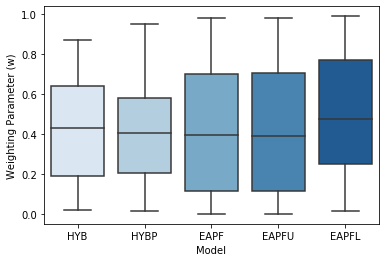

In [103]:
f, ax = plt.subplots() #figsize=(12,8)
all_ws = [n1EAPFU_ws, n1EAPFL_ws, n1EAPF_ws, HYBP_ws, HYB_ws]
ax = sns.boxplot(data=dat, palette="Blues")
ax.set_xlabel("Model")
ax.set_ylabel("Weighting Parameter (w)")

In [104]:
## Comparing eta1 and eta2

In [114]:
n1EAPFU_a1 = n1EAPFU_SF.loc[(n1EAPFU_SF['value'] == 'eta_1'), 'mean'].values
n1EAPFL_a1 = n1EAPFL_SF.loc[(n1EAPFL_SF['value'] == 'eta_1'), 'mean'].values
n1EAPF_a1 = n1EAPF_SF.loc[(n1EAPF_SF['value'] == 'eta_1'), 'mean'].values
HYBP_a1 = HYBP_SF.loc[(HYBP_SF['value'] == 'eta_1'), 'mean'].values
HYB_a1 = HYB_SF.loc[(HYB_SF['value'] == 'eta_1'), 'mean'].values

n1EAPFU_a2 = n1EAPFU_SF.loc[(n1EAPFU_SF['value'] == 'eta_2'), 'mean'].values
n1EAPFL_a2 = n1EAPFL_SF.loc[(n1EAPFL_SF['value'] == 'eta_2'), 'mean'].values
n1EAPF_a2 = n1EAPF_SF.loc[(n1EAPF_SF['value'] == 'eta_2'), 'mean'].values
HYBP_a2 = HYBP_SF.loc[(HYBP_SF['value'] == 'eta_2'), 'mean'].values
HYB_a2 = HYB_SF.loc[(HYB_SF['value'] == 'eta_2'), 'mean'].values

In [115]:
a1_columns = ['HYB', 'HYBP', 'EAPF', 'EAPFU', 'EAPFL']
a1_dat = DataFrame(np.column_stack([HYB_a1, HYBP_a1, n1EAPF_a1, n1EAPFU_a1, n1EAPFL_a1]), columns=a1_columns)

a2_columns = ['HYB', 'HYBP', 'EAPF', 'EAPFU', 'EAPFL']
a2_dat = DataFrame(np.column_stack([HYB_a2, HYBP_a2, n1EAPF_a2, n1EAPFU_a2, n1EAPFL_a2]), columns=a2_columns)

Text(0, 0.5, 'eta1')

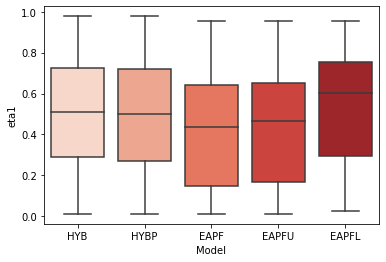

In [123]:
f, ax = plt.subplots() #figsize=(12,8)
ax = sns.boxplot(data=a1_dat, palette="Reds")
ax.set_xlabel("Model")
ax.set_ylabel("eta1")

Text(0, 0.5, 'eta2')

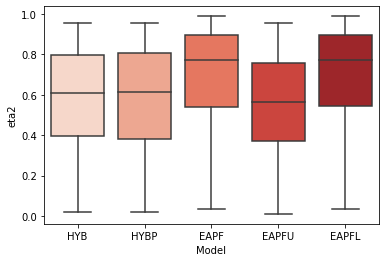

In [125]:
f, ax = plt.subplots() #figsize=(12,8)
ax = sns.boxplot(data=a2_dat, palette="Reds")
ax.set_xlabel("Model")
ax.set_ylabel("eta2")

In [124]:
## Compare inverse temperatures!

In [126]:
n1EAPFU_b1 = n1EAPFU_SF.loc[(n1EAPFU_SF['value'] == 'beta_1'), 'mean'].values
n1EAPFL_b1 = n1EAPFL_SF.loc[(n1EAPFL_SF['value'] == 'beta_1'), 'mean'].values
n1EAPF_b1 = n1EAPF_SF.loc[(n1EAPF_SF['value'] == 'beta_1'), 'mean'].values
HYBP_b1 = HYBP_SF.loc[(HYBP_SF['value'] == 'beta_1'), 'mean'].values
HYB_b1 = HYB_SF.loc[(HYB_SF['value'] == 'beta_1'), 'mean'].values
TDLR_b1 = TDLR_SF.loc[(TDLR_SF['value'] == 'beta1'), 'mean'].values
TDLRP_b1 = TDLRP_SF.loc[(TDLRP_SF['value'] == 'beta1'), 'mean'].values

n1EAPFU_b2 = n1EAPFU_SF.loc[(n1EAPFU_SF['value'] == 'beta_2'), 'mean'].values
n1EAPFL_b2 = n1EAPFL_SF.loc[(n1EAPFL_SF['value'] == 'beta_2'), 'mean'].values
n1EAPF_b2 = n1EAPF_SF.loc[(n1EAPF_SF['value'] == 'beta_2'), 'mean'].values
HYBP_b2 = HYBP_SF.loc[(HYBP_SF['value'] == 'beta_2'), 'mean'].values
HYB_b2 = HYB_SF.loc[(HYB_SF['value'] == 'beta_2'), 'mean'].values
TDLR_b2 = TDLR_SF.loc[(TDLR_SF['value'] == 'beta2'), 'mean'].values
TDLRP_b2 = TDLRP_SF.loc[(TDLRP_SF['value'] == 'beta2'), 'mean'].values

In [127]:
cols = ['HYB', 'HYBP', 'EAPF', 'EAPFU', 'EAPFL', 'TDLR', 'TDLRP']
b1_dat = DataFrame(np.column_stack([HYB_b1, HYBP_b1, n1EAPF_b1, n1EAPFU_b1, n1EAPFL_b1, TDLR_b1, TDLRP_b1]), columns=cols)
b2_dat = DataFrame(np.column_stack([HYB_b2, HYBP_b2, n1EAPF_b2, n1EAPFU_b2, n1EAPFL_b2, TDLR_b2, TDLRP_b2]), columns=cols)


Text(0, 0.5, 'beta1')

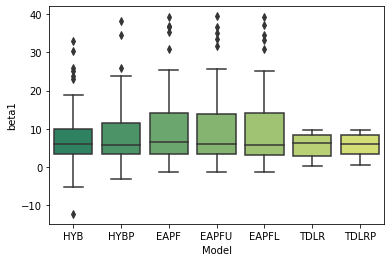

In [128]:
f, ax = plt.subplots() #figsize=(12,8)
ax = sns.boxplot(data=b1_dat, palette="summer")
ax.set_xlabel("Model")
ax.set_ylabel("beta1")

Text(0, 0.5, 'beta2')

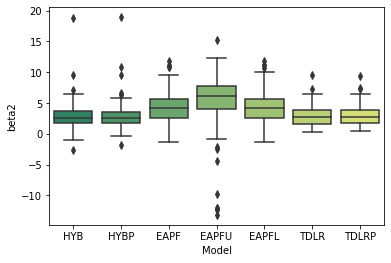

In [129]:
f, ax = plt.subplots() #figsize=(12,8)
ax = sns.boxplot(data=b2_dat, palette="summer")
ax.set_xlabel("Model")
ax.set_ylabel("beta2")